# NLP - Offense Detection

### Group 07

- Carolina Rosemback - up201800171
- José Eduardo Henriques - up201806372
- Miguel Neves - up201608657

## User Manual

Open DetectOffense.ipynb in Jupyter Notebook.

### Notebook Structure

This notebook is separated in sections.

- **(1)** Dataset import, cleanup and tokenization
- **(2)** Data pre-processing *(choose one)*
  - **(2.1)** Bag of Words
  - **(2.2)** Bag of Words with Bigram
  - **(2.3)** Bag of Words with Trigram
  - **(2.4)** TF-IDF
- **(3)** Balancing of dataset and train/test/dev separation
- **(4)** Classifiers *(choose one)*
  - **(4.1)** Logistic Regression
  - **(4.2)** SVM
  - **(4.3)** Decision Tree
  - **(4.4)** Random Forest
  - **(4.5)** MLP (Neural Network)
- **(5)** User input test
  
### Usage

One must run these sequentially. Aditionally, upon changes on a given section, following sections must be re-run.  

Each classifier is separated in two parts. **(4.X.1)** One where the classifier is applied to the training set and **(4.X.2)** another where it tries to predict the result for the given set (either test or dev sets). For each classifier, one must run (4.X.1) cell **at least once** before being able to run the respective (4.X.2) cells. Aditionally, you can test each classifier on your own sentences in section (5).

If while running (4.5.3) MLP learning curve graphic an error occurs or an interruption is made, the kernel might need to be restarted.

## (1) Dataset import and tokenization

In [1]:
import pandas as pd
import re
import nltk
import numpy
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from nltk.util import ngrams


# Importing the dataset
dataset = pd.read_csv('trainv2.csv', delimiter = ',')

print(dataset)

# Cleaning and tokenizing the text

y = numpy.array([])

corpus = []


ps = PorterStemmer()
for i in range(0,9000):
    # get review and remove non alpha chars
    review = re.sub('[^a-zA-Z]', ' ', dataset['text'][i])
    # to lower-case and tokenize
    review = review.lower().split()
    # stemming and stop word removal
    review = ' '.join([ps.stem(w) for w in review if not w in set(stopwords.words('english'))])
    corpus.append(review)
    
    label = dataset['offense_rating'][i]
    
    if(round(label) == 0):
        y = numpy.append(y,0)
    elif(round(label) == 1):
        y = numpy.append(y,1)
    else:
        y = numpy.append(y,2)

print(corpus)
    
    

                                                   text  offense_rating
0     TENNESSEE: We're the best state. Nobody even c...            0.20
1     A man inserted an advertisement in the classif...            1.10
2     How many men does it take to open a can of bee...            2.40
3     Told my mom I hit 1200 Twitter followers. She ...            0.00
4     Roses are dead. Love is fake. Weddings are bas...            0.10
...                                                 ...             ...
8995  What do you call a black man on the moon? An a...            1.05
8996  when im picking someone up and they ask how lo...            0.00
8997  A black lesbian, an obese white neck-beard, an...            1.65
8998  and I recognize the need to use ALL of my plat...            0.00
8999  Get married so you can argue about fun things ...            0.10

[9000 rows x 2 columns]
['tennesse best state nobodi even come close elevennesse walk room tennesse oh shit', 'man insert advertis clas

## (2) Data pre-processing *(choose one)*

### (2.1) Bag of words

In [2]:
from sklearn.feature_extraction.text import CountVectorizer


vectorizer = CountVectorizer(max_features = 1000)
X = vectorizer.fit_transform(corpus).toarray()

print(vectorizer.get_feature_names())

print(X.shape, y.shape)

['abl', 'accept', 'accident', 'accord', 'account', 'acn', 'across', 'act', 'action', 'activ', 'actual', 'ad', 'add', 'adult', 'advic', 'afraid', 'african', 'age', 'ago', 'aid', 'air', 'alcohol', 'aliv', 'allow', 'almost', 'alon', 'alreadi', 'also', 'alway', 'amaz', 'america', 'american', 'angel', 'angri', 'anim', 'announc', 'annoy', 'anoth', 'answer', 'anti', 'antioxid', 'anxieti', 'anybodi', 'anymor', 'anyon', 'anyth', 'anyway', 'apart', 'appar', 'appl', 'appreci', 'approach', 'arab', 'area', 'argu', 'argument', 'arm', 'around', 'arrest', 'asian', 'ask', 'ass', 'ate', 'attack', 'attent', 'attract', 'aunti', 'averag', 'avoid', 'awar', 'away', 'babi', 'back', 'bad', 'bag', 'ball', 'banana', 'bank', 'bar', 'bartend', 'base', 'bathroom', 'bear', 'beat', 'beauti', 'becam', 'becom', 'bed', 'bedroom', 'bee', 'beer', 'begin', 'behind', 'believ', 'best', 'better', 'big', 'biggest', 'bird', 'birthday', 'bit', 'black', 'blind', 'blond', 'blood', 'blow', 'blue', 'bodi', 'book', 'born', 'boss', 'b

### (2.2) Bag of words with Bigram

In [38]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features = 1000, ngram_range = (1,2))
X = vectorizer.fit_transform(corpus).toarray()

print(vectorizer.get_feature_names())

print(X.shape, y.shape)

['abl', 'accept', 'accident', 'accord', 'account', 'across', 'act', 'action', 'activ', 'actual', 'ad', 'add', 'adult', 'advic', 'afraid', 'african', 'age', 'ago', 'aid', 'air', 'alcohol', 'aliv', 'allow', 'almost', 'alon', 'alreadi', 'also', 'alway', 'amaz', 'america', 'american', 'american idol', 'angel', 'angri', 'anim', 'announc', 'annoy', 'anoth', 'answer', 'anti', 'antioxid', 'anxieti', 'anybodi', 'anymor', 'anyon', 'anyth', 'anyway', 'apart', 'appar', 'appl', 'appreci', 'approach', 'arab', 'area', 'argu', 'argument', 'arm', 'around', 'arrest', 'asian', 'ask', 'ass', 'ate', 'attack', 'attent', 'attract', 'aunti', 'aunti red', 'averag', 'avoid', 'awar', 'away', 'babi', 'back', 'bad', 'bag', 'ball', 'bank', 'bar', 'bartend', 'base', 'bathroom', 'bear', 'beat', 'beauti', 'becom', 'bed', 'bedroom', 'bee', 'beer', 'begin', 'behind', 'believ', 'best', 'better', 'big', 'biggest', 'bird', 'birthday', 'bit', 'black', 'black guy', 'black kid', 'black man', 'black peopl', 'black tran', 'blin

### (2.3) Bag of words with Trigram

In [43]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features = 1000, ngram_range = (1,3))
X = vectorizer.fit_transform(corpus).toarray()

print(vectorizer.get_feature_names())

print(X.shape, y.shape)

['abl', 'accept', 'accident', 'accord', 'account', 'across', 'act', 'action', 'activ', 'actual', 'ad', 'add', 'adult', 'advic', 'afraid', 'african', 'age', 'ago', 'aid', 'air', 'alcohol', 'aliv', 'allow', 'almost', 'alon', 'alreadi', 'also', 'alway', 'amaz', 'america', 'american', 'american idol', 'angel', 'angri', 'anim', 'announc', 'annoy', 'anoth', 'answer', 'anti', 'antioxid', 'anxieti', 'anymor', 'anyon', 'anyth', 'anyway', 'apart', 'appar', 'appl', 'appreci', 'approach', 'arab', 'area', 'argu', 'argument', 'arm', 'around', 'arrest', 'asian', 'ask', 'ass', 'ate', 'attack', 'attent', 'attract', 'aunti', 'aunti red', 'aunti red tweet', 'averag', 'avoid', 'awar', 'away', 'babi', 'back', 'bad', 'bag', 'ball', 'bank', 'bar', 'bartend', 'base', 'bathroom', 'bear', 'beat', 'beauti', 'becam', 'becom', 'bed', 'bedroom', 'bee', 'beer', 'begin', 'behind', 'believ', 'best', 'better', 'big', 'biggest', 'bird', 'birthday', 'bit', 'black', 'black guy', 'black kid', 'black man', 'black peopl', 'b

### (2.4) TF-IDF

In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus).toarray()

print(vectorizer.get_feature_names())

print(X.shape, y.shape)

['aa', 'aaa', 'aaaa', 'aaaaafddasfrw', 'aap', 'ab', 'abacu', 'abandon', 'abba', 'abbey', 'abbrevi', 'abc', 'abdomin', 'abduct', 'abdul', 'abdullah', 'abercrombi', 'aberdeen', 'abi', 'abil', 'abl', 'abnorm', 'aboard', 'abolish', 'abort', 'abound', 'abouttit', 'abra', 'abraham', 'abram', 'abroad', 'abruptli', 'absenc', 'absent', 'absolut', 'absorb', 'absorpt', 'abstain', 'abstract', 'absurd', 'abu', 'abulia', 'abund', 'abus', 'abuzz', 'abysm', 'abyss', 'academ', 'academi', 'accent', 'accept', 'access', 'accessori', 'acci', 'accid', 'accident', 'accommod', 'accomplish', 'accord', 'accordion', 'account', 'accumul', 'accur', 'accuraci', 'accus', 'ace', 'aceton', 'ach', 'achiev', 'acid', 'ackl', 'acknowledg', 'aclu', 'acn', 'acquir', 'across', 'act', 'actimist', 'action', 'activ', 'activis', 'activist', 'actor', 'actress', 'actual', 'ad', 'adam', 'adapt', 'add', 'adderal', 'addict', 'addison', 'addit', 'address', 'adel', 'adept', 'adha', 'adhd', 'adhes', 'adject', 'adjust', 'adkwodrtrgfvnfif

## (3) Balancing of dataset and train/test/dev separation

In [3]:
# check version number
import imblearn
from sklearn.datasets import make_classification
from matplotlib import pyplot
from numpy import where
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split

zeros = 0
ones = 0
twos = 0
    
over = SMOTE({0:6483,1:3000,2:3000})
under = RandomUnderSampler({0: 3000, 1: 3000, 2: 3000})
X, y = over.fit_resample(X, y)
X, y = under.fit_resample(X, y)

        
for i in list(y):
    if i == 0:
        zeros+=1
    elif i == 1:
        ones+=1
    else:
        twos +=1   

        
print("Number of zeros: ", zeros)
print("Number of ones: ", ones)
print("Number of twos: ", twos)


percentage = 0.15
aux = percentage*len(y)

x_temp, x_test, y_temp, y_test = train_test_split(X, y, test_size = percentage, random_state = 0)
x_train, x_dev, y_train, y_dev = train_test_split(x_temp, y_temp, test_size = aux/(len(y)-aux), random_state = 0)

print("\nTrain:")
print(x_train.shape, y_train.shape)
print("Test:")
print(x_test.shape, y_test.shape)
print("Dev:")
print(x_dev.shape, y_dev.shape)

C:\Users\ZezeH\anaconda3\lib\site-packages\imblearn\utils\_validation.py:587: FutureWarning: Pass sampling_strategy={0: 6483, 1: 3000, 2: 3000} as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn(
C:\Users\ZezeH\anaconda3\lib\site-packages\imblearn\utils\_validation.py:587: FutureWarning: Pass sampling_strategy={0: 3000, 1: 3000, 2: 3000} as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn(


Number of zeros:  3000
Number of ones:  3000
Number of twos:  3000

Train:
(6300, 1000) (6300,)
Test:
(1350, 1000) (1350,)
Dev:
(1350, 1000) (1350,)


## (4) Classifiers *(choose one)*

### (4.1.1) Logistic Regression

In [4]:
from sklearn.linear_model import LogisticRegression
import time


start = time.time()
lr_classifier = LogisticRegression(max_iter=1000, penalty="l2")
lr_classifier.fit(x_train, y_train)
print("Elapsed time: " + str(time.time() - start))

Elapsed time: 1.3065464496612549


### (4.1.2) Logistic Regression: Test

Elapsed time: 0.10599899291992188
Accuracy:  0.47333333333333333
Precision:  [0.53467153 0.40601504 0.45657568]
Recall:  [0.67667436 0.35294118 0.40174672]
F1:  [0.59734964 0.37762238 0.42740999]
F1 avg:  0.4674606697430596


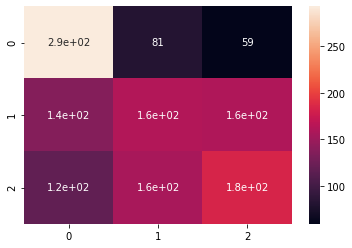

In [41]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import time


start = time.time()
y_pred = lr_classifier.predict(x_test)
print("Elapsed time: "+ str(time.time() - start))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred, average=None))
print('Recall: ', recall_score(y_test, y_pred, average=None))
print('F1: ', f1_score(y_test, y_pred, average=None))
print('F1 avg: ', f1_score(y_test, y_pred, average="macro"))

### (4.1.2) Logistic Regression: Dev

Elapsed time: 0.008963584899902344
Accuracy:  0.46814814814814815
Precision:  [0.54676259 0.39841689 0.42650602]
Recall:  [0.67706013 0.33186813 0.39686099]
F1:  [0.60497512 0.36211031 0.41114983]
F1 avg:  0.4594117539708937


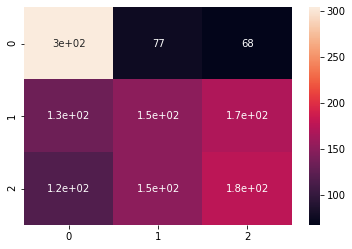

In [46]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import time


start = time.time()
y_pred = lr_classifier.predict(x_dev)
print("Elapsed time: " + str(time.time() - start))

sns.heatmap(confusion_matrix(y_dev, y_pred), annot=True)
print('Accuracy: ', accuracy_score(y_dev, y_pred))
print('Precision: ', precision_score(y_dev, y_pred, average=None))
print('Recall: ', recall_score(y_dev, y_pred, average=None))
print('F1: ', f1_score(y_dev, y_pred, average=None, labels=numpy.unique(y_pred)))
print('F1 avg: ', f1_score(y_dev, y_pred, average="macro"))

### (4.2.1) SVM

In [25]:
from sklearn.svm import SVC
import time


start = time.time()
svm_classifier = SVC()
svm_classifier.fit(x_train, y_train)
print("Elapsed time: " + str(time.time() - start))

Elapsed time: 279.9256491661072


### (4.2.2) SVM: Test

Elapsed time: 122.29316425323486
Accuracy:  0.8496296296296296
Precision:  [0.70735786 0.96226415 0.96325459]
Recall:  [0.97690531 0.77777778 0.80131004]
F1:  [0.82056256 0.86024096 0.87485101]
F1 avg:  0.8518848458623416


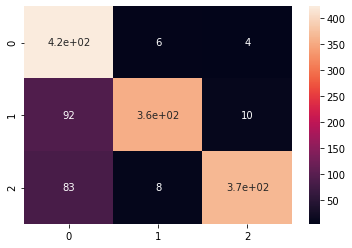

In [17]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import time


start = time.time()
y_pred = svm_classifier.predict(x_test)
print("Elapsed time: "+ str(time.time() - start))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred, average=None))
print('Recall: ', recall_score(y_test, y_pred, average=None))
print('F1: ', f1_score(y_test, y_pred, average=None, labels=numpy.unique(y_pred)))
print('F1 avg: ', f1_score(y_test, y_pred, average="macro"))

### (4.2.2) SVM: Dev

Elapsed time: 7.622674465179443
Accuracy:  0.48148148148148145
Precision:  [0.62387387 0.4032634  0.41928721]
Recall:  [0.6169265  0.38021978 0.44843049]
F1:  [0.62038074 0.39140271 0.43336945]
F1 avg:  0.4817176338226093


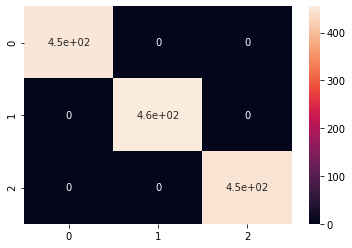

In [48]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import time


start = time.time()
y_pred = svm_classifier.predict(x_dev)
print("Elapsed time: " + str(time.time() - start))

sns.heatmap(confusion_matrix(y_dev, y_dev), annot=True)
print('Accuracy: ', accuracy_score(y_dev, y_pred))
print('Precision: ', precision_score(y_dev, y_pred, average=None))
print('Recall: ', recall_score(y_dev, y_pred, average=None))
print('F1: ', f1_score(y_dev, y_pred, average=None, labels=numpy.unique(y_pred)))
print('F1 avg: ', f1_score(y_dev, y_pred, average="macro"))

### (4.3.1) Decision Tree

In [26]:
from sklearn.tree import DecisionTreeClassifier
import time


start = time.time()
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(x_train, y_train)
print("Elapsed time: " + str(time.time() - start))

Elapsed time: 46.19869875907898


### (4.3.2) Decision Tree: Test

Elapsed time: 0.07700252532958984
Accuracy:  0.725925925925926
Precision:  [0.72767857 0.70132743 0.74888889]
Recall:  [0.75288684 0.69063181 0.73580786]
F1:  [0.7400681  0.69593853 0.74229075]
F1 avg:  0.7260991274714598


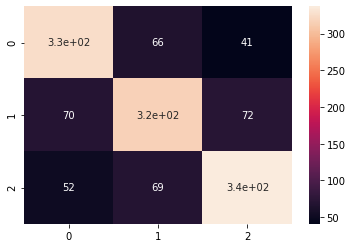

In [20]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import time


start = time.time()
y_pred = dt_classifier.predict(x_test)
print("Elapsed time: " + str(time.time() - start))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred, average=None))
print('Recall: ', recall_score(y_test, y_pred, average=None))
print('F1: ', f1_score(y_test, y_pred, average=None))
print('F1 avg: ', f1_score(y_test, y_pred, average="macro"))

### (4.3.2) Decision Tree: Dev

Elapsed time: 0.011006355285644531
Accuracy:  0.4192592592592593
Precision:  [0.48055988 0.35889571 0.36745407]
Recall:  [0.68819599 0.25714286 0.31390135]
F1:  [0.56593407 0.29961588 0.33857316]
F1 avg:  0.4013743663334071


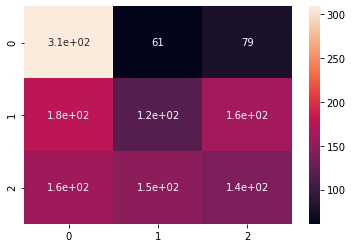

In [50]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import time


start = time.time()
y_pred = dt_classifier.predict(x_dev)
print("Elapsed time: " + str(time.time() - start))

sns.heatmap(confusion_matrix(y_dev, y_pred), annot=True)
print('Accuracy: ', accuracy_score(y_dev, y_pred))
print('Precision: ', precision_score(y_dev, y_pred, average=None))
print('Recall: ', recall_score(y_dev, y_pred, average=None))
print('F1: ', f1_score(y_dev, y_pred, average=None))
print('F1 avg: ', f1_score(y_dev, y_pred, average="macro"))

### (4.4.1) Random Forest

In [27]:
from sklearn.ensemble import RandomForestClassifier
import time


start = time.time()
rf_classifier = RandomForestClassifier()
rf_classifier.fit(x_train, y_train)
print("Elapsed time: " + str(time.time() - start))

Elapsed time: 47.19971942901611


### (4.4.2) Random Forest : Test

Elapsed time: 0.25654029846191406
Accuracy:  0.8496296296296296
Precision:  [0.78744939 0.91315136 0.86092715]
Recall:  [0.89838337 0.80174292 0.85152838]
F1:  [0.83926645 0.85382831 0.85620198]
F1 avg:  0.8497655776773837


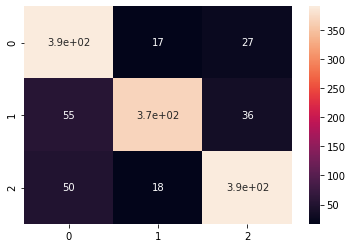

In [28]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import time


start = time.time()
y_pred = rf_classifier.predict(x_test)
print("Elapsed time: " + str(time.time() - start))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred, average=None))
print('Recall: ', recall_score(y_test, y_pred, average=None))
print('F1: ', f1_score(y_test, y_pred, average=None))
print('F1 avg: ', f1_score(y_test, y_pred, average="macro"))

### (4.4.2) Random Forest : Dev

Elapsed time: 0.1804485321044922
Accuracy:  0.4311111111111111
Precision:  [0.4769688  0.38243626 0.38888889]
Recall:  [0.71492205 0.2967033  0.28251121]
F1:  [0.57219251 0.33415842 0.32727273]
F1 avg:  0.4112078854944318


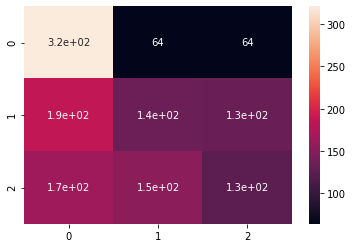

In [52]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import time


start = time.time()
y_pred = rf_classifier.predict(x_dev)
print("Elapsed time: " + str(time.time() - start))

sns.heatmap(confusion_matrix(y_dev, y_pred), annot=True)
print('Accuracy: ', accuracy_score(y_dev, y_pred))
print('Precision: ', precision_score(y_dev, y_pred, average=None))
print('Recall: ', recall_score(y_dev, y_pred, average=None))
print('F1: ', f1_score(y_dev, y_pred, average=None))
print('F1 avg: ', f1_score(y_dev, y_pred, average="macro"))

### (4.5.1) MLP (Neural Network):

In [57]:
from sklearn.neural_network import MLPClassifier
import time

start = time.time()
mlp_classifier = MLPClassifier(max_iter=500, alpha=1e-5, random_state=1, early_stopping=True)
mlp_classifier.fit(x_train, y_train)
print("Elapsed time: " + str(time.time() - start))

Elapsed time: 131.87470722198486


### (4.5.2) MLP (Neural Network): Test

Elapsed time: 0.061018943786621094
Accuracy:  0.46296296296296297
Precision:  [0.51473137 0.40920716 0.43979058]
Recall:  [0.68591224 0.34858388 0.36681223]
F1:  [0.58811881 0.37647059 0.4       ]
F1 avg:  0.4548631333721607


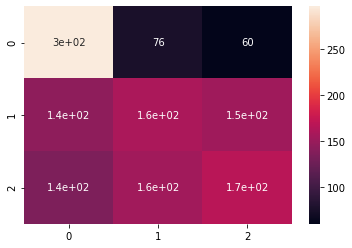

In [54]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import time


start = time.time()
y_pred = mlp_classifier.predict(x_test)
print("Elapsed time: " + str(time.time() - start))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred, average=None))
print('Recall: ', recall_score(y_test, y_pred, average=None))
print('F1: ', f1_score(y_test, y_pred, average=None))
print('F1 avg: ', f1_score(y_test, y_pred, average="macro"))

### (4.5.2) MLP (Neural Network): Dev

Elapsed time: 0.07000446319580078
Accuracy:  0.4362962962962963
Precision:  [0.48943089 0.36962751 0.4119171 ]
Recall:  [0.67037862 0.28351648 0.35650224]
F1:  [0.56578947 0.32089552 0.38221154]
F1 avg:  0.42296551151126954


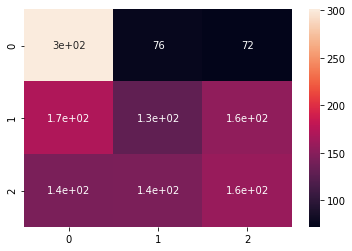

In [56]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import time


start = time.time()
y_pred = mlp_classifier.predict(x_dev)
print("Elapsed time: " + str(time.time() - start))

sns.heatmap(confusion_matrix(y_dev, y_pred), annot=True)
print('Accuracy: ', accuracy_score(y_dev, y_pred))
print('Precision: ', precision_score(y_dev, y_pred, average=None))
print('Recall: ', recall_score(y_dev, y_pred, average=None))
print('F1: ', f1_score(y_dev, y_pred, average=None))
print('F1 avg: ', f1_score(y_dev, y_pred, average="macro"))

### (4.5.3) MLP (Neural Network): Graphic

Running...

learning on dataset MLP learning curve
AxesSubplot(0.125,0.125;0.775x0.755)
training: sgd with relu
Training set accuracy: 0.693968
Training set loss: 1.027615
training: adam with relu
Training set accuracy: 1.000000
Training set loss: 0.003189
training: sgd with tanh
Training set accuracy: 0.696667
Training set loss: 0.987114
training: adam with tanh
Training set accuracy: 1.000000
Training set loss: 0.003197
training: sgd with identity
Training set accuracy: 0.696667
Training set loss: 0.986929
training: adam with identity
Training set accuracy: 1.000000
Training set loss: 0.003184
training: sgd with logistic
Training set accuracy: 0.332698
Training set loss: 1.098803
training: adam with logistic
Training set accuracy: 1.000000
Training set loss: 0.014587


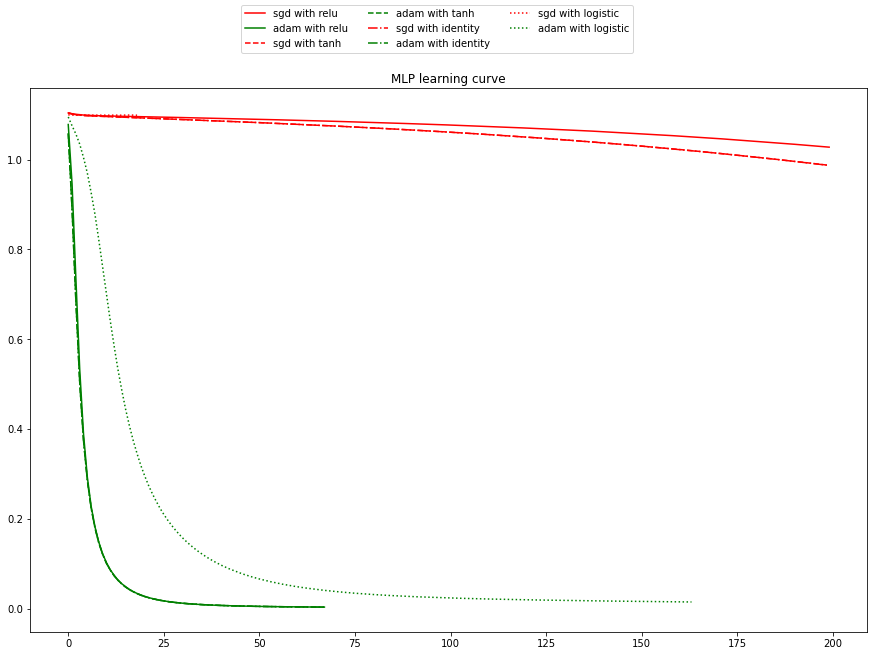

In [30]:
from sklearn.neural_network import MLPClassifier

import warnings
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn import datasets
from sklearn.exceptions import ConvergenceWarning

# different learning rate schedules and momentum parameters

params = [{'solver': 'sgd', 'activation': 'relu'},
          {'solver': 'adam', 'activation': 'relu'},
          {'solver': 'sgd', 'activation': 'tanh'},
          {'solver': 'adam', 'activation': 'tanh'},
          {'solver': 'sgd', 'activation': 'identity'},
          {'solver': 'adam', 'activation': 'identity'},
          {'solver': 'sgd', 'activation': 'logistic'},
          {'solver': 'adam', 'activation': 'logistic'}]

labels = ["sgd with relu", "adam with relu",
          "sgd with tanh", "adam with tanh",
          "sgd with identity", "adam with identity",
          "sgd with logistic", "adam with logistic"]

plot_args = [{'c': 'red', 'linestyle': '-'},
             {'c': 'green', 'linestyle': '-'},
             {'c': 'red', 'linestyle': '--'},
             {'c': 'green', 'linestyle': '--'},
             {'c': 'red', 'linestyle': '-.'},
             {'c': 'green', 'linestyle': '-.'},
             {'c': 'red', 'linestyle': ':'},
             {'c': 'green', 'linestyle': ':'}]



def plot_on_dataset(X, y, ax, name):
    # for each dataset, plot learning for each learning strategy
    print("\nlearning on dataset %s" % name)
    print(ax);
    ax.set_title(name)
    mlps = []
        
    for label, param in zip(labels, params):
        print("training: %s" % label)
        mlp = MLPClassifier(random_state=0, **param)

        # some parameter combinations will not converge as can be seen on the
        # plots so they are ignored here
        with warnings.catch_warnings():
            warnings.filterwarnings("ignore", category=ConvergenceWarning, module="sklearn")
            mlp.fit(X, y)

        mlps.append(mlp)
        print("Training set accuracy: %f" % mlp.score(X, y))
        print("Training set loss: %f" % mlp.loss_)
    for mlp, label, args in zip(mlps, labels, plot_args):
        ax.plot(mlp.loss_curve_, label=label, **args)


print("Running...")        
        
fig, axes = plt.subplots(1, 1, figsize=(15, 10))

plot_on_dataset(X=x_train, y=y_train, ax=axes, name='MLP learning curve')

fig.legend(axes.get_lines(), labels, ncol=3, loc="upper center")
plt.show()


## (5) User input test

In [12]:
import re

sentence = input("Enter sentence: ")
sentence = re.sub('[^a-zA-Z]', ' ', sentence).lower().split()
sentence = ' '.join([ps.stem(w) for w in sentence])
X = vectorizer.transform([sentence]).toarray()

while(True):
    print("[1] Logistic Regression\n[2] SVM\n[3] Decision Tree\n[4] Random Forest\n[5] MLP")
    option = int(input("Choose a classifier (enter respective number): "))
    if(option >= 1 and option <= 5):
        break;

classifier = None
if(option == 1):
    classifier = lr_classifier
elif(option == 2):
    classifier = svm_classifier
elif(option == 3):
    classifier = svm_classifier
elif(option == 4):
    classifier = svm_classifier
elif(option == 5):
    classifier = svm_classifier
else:
    print("ERROR")

if(classifier is not None):
    prediction = classifier.predict(X)
    if(classifier.predict(X) == [0]):
        print('Not offensive')
    elif(classifier.predict(X) == [1]):
        print('Offensive')
    elif(classifier.predict(X) == [2]):
        print('Very Offensive')

Enter sentence: your mom is ugly
[1] Logistic Regression
[2] SVM
[3] Decision Tree
[4] Random Forest
[5] MLP
Choose a classifier (enter respective number): 1
Very Offensive
